In [8]:
from bs4 import BeautifulSoup
import requests
import pandas as pd
import matplotlib.pyplot as plt
import json 
import numpy as np
import seaborn as sns

In [9]:
df_covid=pd.read_csv("all-states-history.csv")
df_covid

,date,state,death,deathConfirmed,deathIncrease,deathProbable,hospitalized,hospitalizedCumulative,hospitalizedCurrently,hospitalizedIncrease,...,totalTestResults,totalTestResultsIncrease,totalTestsAntibody,totalTestsAntigen,totalTestsPeopleAntibody,totalTestsPeopleAntigen,totalTestsPeopleViral,totalTestsPeopleViralIncrease,totalTestsViral,totalTestsViralIncrease
0,2021-03-07,AK,305.0,NaN,0,NaN,1293.0,1293.0,33.0,0,...,1731628.0,0,NaN,NaN,NaN,NaN,NaN,0,1731628.0,0
1,2021-03-07,AL,10148.0,7963.0,-1,2185.0,45976.0,45976.0,494.0,0,...,2323788.0,2347,NaN,NaN,119757.0,NaN,2323788.0,2347,NaN,0
2,2021-03-07,AR,5319.0,4308.0,22,1011.0,14926.0,14926.0,335.0,11,...,2736442.0,3380,NaN,NaN,NaN,481311.0,NaN,0,2736442.0,3380
3,2021-03-07,AS,0.0,NaN,0,NaN,NaN,NaN,NaN,0,...,2140.0,0,NaN,NaN,NaN,NaN,NaN,0,2140.0,0
4,2021-03-07,AZ,16328.0,14403.0,5,1925.0,57907.0,57907.0,963.0,44,...,7908105.0,45110,580569.0,NaN,444089.0,NaN,3842945.0,14856,7908105.0,45110
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20775,2020-01-17,WA,NaN,NaN,0,NaN,NaN,NaN,NaN,0,...,NaN,0,NaN,NaN,NaN,NaN,NaN,0,NaN,0
20776,2020-01-16,WA,NaN,NaN,0,NaN,NaN,NaN,NaN,0,...,NaN,0,NaN,NaN,NaN,NaN,NaN,0,NaN,0
20777,2020-01-15,WA,NaN,NaN,0,NaN,NaN,NaN,NaN,0,...,NaN,0,NaN,NaN,NaN,NaN,NaN,0,NaN,0
20778,2020-01-14,WA,NaN,NaN,0,NaN,NaN,NaN,NaN,0,...,NaN,0,NaN,NaN,NaN,NaN,NaN,0,NaN,0


In [10]:
# Replace all the NaN with 0
df_covid=df_covid.fillna(0)

In [11]:
#Renaming the state column to States
df_covid=df_covid.rename(columns={'state':'States'})

In [20]:
#Performed a groupby() function by State. Making it the new index, then using the sum() function add all the values by state. 
#This causes the date index to be dropped. 
by_state=df_covid.groupby('States').sum()
by_state

,death,deathConfirmed,deathIncrease,deathProbable,hospitalized,hospitalizedCumulative,hospitalizedCurrently,hospitalizedIncrease,inIcuCumulative,inIcuCurrently,...,totalTestResults,totalTestResultsIncrease,totalTestsAntibody,totalTestsAntigen,totalTestsPeopleAntibody,totalTestsPeopleAntigen,totalTestsPeopleViral,totalTestsPeopleViralIncrease,totalTestsViral,totalTestsViralIncrease
States,,,,,,,,,,,,,,,,,,,,,
AK,31486.0,14454.0,305,0.0,157626.0,157626.0,17804.0,1293,0.0,0.0,...,2.082177e+08,1731620,0.0,0.0,0.0,0.0,0.000000e+00,0,2.082177e+08,1731628
AL,1038241.0,897681.0,10148,136027.0,6133645.0,6133645.0,404951.0,45976,526982.0,0.0,...,3.662777e+08,2323788,0.0,0.0,15188638.0,0.0,3.662777e+08,2323788,0.000000e+00,0
AR,601561.0,468918.0,5319,82996.0,2017792.0,2017792.0,188044.0,14926,344.0,52440.0,...,3.685376e+08,2736436,0.0,512573.0,0.0,34473042.0,0.000000e+00,0,3.685376e+08,2736442
AS,0.0,0.0,0,0.0,0.0,0.0,0.0,0,0.0,0.0,...,4.445310e+05,2140,0.0,0.0,0.0,0.0,0.000000e+00,0,4.445310e+05,2140
AZ,1918434.0,1710791.0,16328,159627.0,7425807.0,7425807.0,640831.0,57903,0.0,172806.0,...,9.190266e+08,7908072,580569.0,0.0,86926215.0,0.0,5.293555e+08,3842945,9.190266e+08,7908105
CA,5733089.0,0.0,54124,0.0,0.0,0.0,2653612.0,0,0.0,668693.0,...,5.833385e+09,49645499,0.0,0.0,0.0,0.0,0.000000e+00,0,5.833385e+09,49646014
CO,908462.0,748037.0,5989,135029.0,3478740.0,3478740.0,231196.0,23904,0.0,0.0,...,7.034087e+08,6415123,59136195.0,0.0,0.0,0.0,3.669939e+08,2616541,0.000000e+00,0
CT,1584666.0,1217530.0,7704,281155.0,3575391.0,3575391.0,214270.0,12257,0.0,0.0,...,7.782720e+08,6520363,0.0,21296260.0,0.0,0.0,0.000000e+00,0,7.782720e+08,6520366
DC,207067.0,0.0,1030,0.0,0.0,0.0,58996.0,0,0.0,15628.0,...,1.546670e+08,1261357,0.0,0.0,0.0,0.0,6.874351e+07,441942,0.000000e+00,0


In [28]:
by_state=by_state.reset_index()
by_state

,States,death,deathConfirmed,deathIncrease,deathProbable,hospitalized,hospitalizedCumulative,hospitalizedCurrently,hospitalizedIncrease,inIcuCumulative,...,totalTestResults,totalTestResultsIncrease,totalTestsAntibody,totalTestsAntigen,totalTestsPeopleAntibody,totalTestsPeopleAntigen,totalTestsPeopleViral,totalTestsPeopleViralIncrease,totalTestsViral,totalTestsViralIncrease
0,AK,31486.0,14454.0,305,0.0,157626.0,157626.0,17804.0,1293,0.0,...,2.082177e+08,1731620,0.0,0.0,0.0,0.0,0.000000e+00,0,2.082177e+08,1731628
1,AL,1038241.0,897681.0,10148,136027.0,6133645.0,6133645.0,404951.0,45976,526982.0,...,3.662777e+08,2323788,0.0,0.0,15188638.0,0.0,3.662777e+08,2323788,0.000000e+00,0
2,AR,601561.0,468918.0,5319,82996.0,2017792.0,2017792.0,188044.0,14926,344.0,...,3.685376e+08,2736436,0.0,512573.0,0.0,34473042.0,0.000000e+00,0,3.685376e+08,2736442
3,AS,0.0,0.0,0,0.0,0.0,0.0,0.0,0,0.0,...,4.445310e+05,2140,0.0,0.0,0.0,0.0,0.000000e+00,0,4.445310e+05,2140
4,AZ,1918434.0,1710791.0,16328,159627.0,7425807.0,7425807.0,640831.0,57903,0.0,...,9.190266e+08,7908072,580569.0,0.0,86926215.0,0.0,5.293555e+08,3842945,9.190266e+08,7908105
5,CA,5733089.0,0.0,54124,0.0,0.0,0.0,2653612.0,0,0.0,...,5.833385e+09,49645499,0.0,0.0,0.0,0.0,0.000000e+00,0,5.833385e+09,49646014
6,CO,908462.0,748037.0,5989,135029.0,3478740.0,3478740.0,231196.0,23904,0.0,...,7.034087e+08,6415123,59136195.0,0.0,0.0,0.0,3.669939e+08,2616541,0.000000e+00,0
7,CT,1584666.0,1217530.0,7704,281155.0,3575391.0,3575391.0,214270.0,12257,0.0,...,7.782720e+08,6520363,0.0,21296260.0,0.0,0.0,0.000000e+00,0,7.782720e+08,6520366
8,DC,207067.0,0.0,1030,0.0,0.0,0.0,58996.0,0,0.0,...,1.546670e+08,1261357,0.0,0.0,0.0,0.0,6.874351e+07,441942,0.000000e+00,0
9,DE,228375.0,202801.0,1473,25574.0,0.0,0.0,61269.0,0,0.0,...,1.745888e+08,1431942,0.0,0.0,0.0,0.0,9.695583e+07,633424,0.000000e+00,0


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
        51, 52, 53, 54, 55]), <a list of 56 Text major ticklabel objects>)

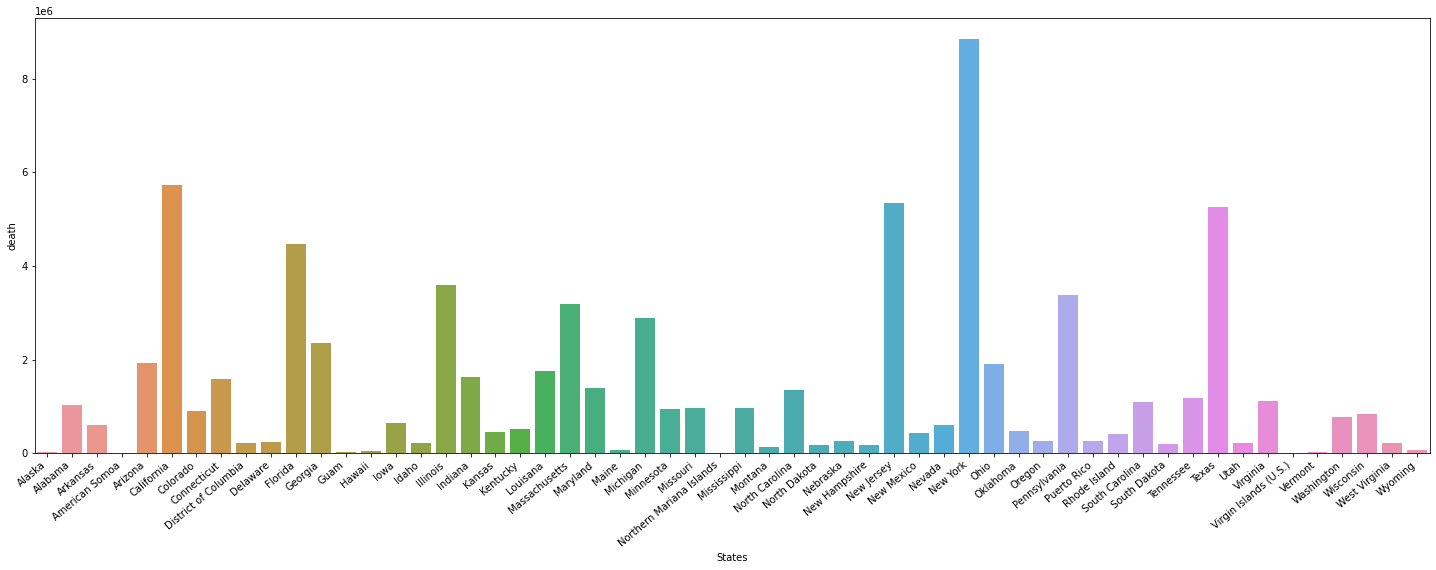

In [142]:
sns.barplot(x='States',y='death', data=by_state, ci=None)

current_graph=plt.gcf()
current_graph.set_size_inches(25,8)
plt.xticks(rotation=40, horizontalalignment='right')

In [122]:
by_state.iat[0,0]='Alaska'
by_state.iat[1,0]='Alabama'
by_state.iat[2,0]='Arkansas'
by_state.iat[3,0]='American Somoa'
by_state.iat[4,0]='Arizona'
by_state.iat[5,0]='California'
by_state.iat[6,0]='Colorado'
by_state.iat[7,0]='Connecticut'
by_state.iat[8,0]='District of Columbia'
by_state.iat[9,0]='Delaware'
by_state.iat[10,0]='Florida'
by_state.iat[11,0]='Georgia'
by_state.iat[12,0]='Guam'
by_state.iat[13,0]='Hawaii'
by_state.iat[14,0]='Iowa'
by_state.iat[15,0]='Idaho'
by_state.iat[16,0]='Illinois'
by_state.iat[17,0]='Indiana'
by_state.iat[18,0]='Kansas'
by_state.iat[19,0]='Kentucky'
by_state.iat[20,0]='Louisana'
by_state.iat[21,0]='Massachusetts'
by_state.iat[22,0]='Maryland'
by_state.iat[23,0]='Maine'
by_state.iat[24,0]='Michigan'
by_state.iat[25,0]='Minnesota'
by_state.iat[26,0]='Missouri'
by_state.iat[27,0]='Northern Mariana Islands'
by_state.iat[28,0]='Mississippi'
by_state.iat[29,0]='Montana'
by_state.iat[30,0]='North Carolina'
by_state.iat[31,0]='North Dakota'
by_state.iat[32,0]='Nebraska'
by_state.iat[33,0]='New Hampshire'
by_state.iat[34,0]='New Jersey'
by_state.iat[35,0]='New Mexico'
by_state.iat[36,0]='Nevada'
by_state.iat[37,0]='New York'
by_state.iat[38,0]='Ohio'
by_state.iat[39,0]='Oklahoma'
by_state.iat[40,0]='Oregon'
by_state.iat[41,0]='Pennsylvania'
by_state.iat[42,0]='Puerto Rico'
by_state.iat[43,0]='Rhode Island'
by_state.iat[44,0]='South Carolina'
by_state.iat[45,0]='South Dakota'
by_state.iat[46,0]='Tennessee'
by_state.iat[47,0]='Texas'
by_state.iat[48,0]='Utah'
by_state.iat[49,0]='Virginia'
by_state.iat[50,0]='Virgin Islands (U.S.)'
by_state.iat[51,0]='Vermont'
by_state.iat[52,0]='Washington'
by_state.iat[53,0]='Wisconsin'
by_state.iat[54,0]='West Virginia'
by_state.iat[55,0]='Wyoming'

In [123]:
by_state

,States,death,deathConfirmed,deathIncrease,deathProbable,hospitalized,hospitalizedCumulative,hospitalizedCurrently,hospitalizedIncrease,inIcuCumulative,...,totalTestResults,totalTestResultsIncrease,totalTestsAntibody,totalTestsAntigen,totalTestsPeopleAntibody,totalTestsPeopleAntigen,totalTestsPeopleViral,totalTestsPeopleViralIncrease,totalTestsViral,totalTestsViralIncrease
0,Alaska,31486.0,14454.0,305,0.0,157626.0,157626.0,17804.0,1293,0.0,...,2.082177e+08,1731620,0.0,0.0,0.0,0.0,0.000000e+00,0,2.082177e+08,1731628
1,Alabama,1038241.0,897681.0,10148,136027.0,6133645.0,6133645.0,404951.0,45976,526982.0,...,3.662777e+08,2323788,0.0,0.0,15188638.0,0.0,3.662777e+08,2323788,0.000000e+00,0
2,Arkansas,601561.0,468918.0,5319,82996.0,2017792.0,2017792.0,188044.0,14926,344.0,...,3.685376e+08,2736436,0.0,512573.0,0.0,34473042.0,0.000000e+00,0,3.685376e+08,2736442
3,American Somoa,0.0,0.0,0,0.0,0.0,0.0,0.0,0,0.0,...,4.445310e+05,2140,0.0,0.0,0.0,0.0,0.000000e+00,0,4.445310e+05,2140
4,Arizona,1918434.0,1710791.0,16328,159627.0,7425807.0,7425807.0,640831.0,57903,0.0,...,9.190266e+08,7908072,580569.0,0.0,86926215.0,0.0,5.293555e+08,3842945,9.190266e+08,7908105
5,California,5733089.0,0.0,54124,0.0,0.0,0.0,2653612.0,0,0.0,...,5.833385e+09,49645499,0.0,0.0,0.0,0.0,0.000000e+00,0,5.833385e+09,49646014
6,Colorado,908462.0,748037.0,5989,135029.0,3478740.0,3478740.0,231196.0,23904,0.0,...,7.034087e+08,6415123,59136195.0,0.0,0.0,0.0,3.669939e+08,2616541,0.000000e+00,0
7,Connecticut,1584666.0,1217530.0,7704,281155.0,3575391.0,3575391.0,214270.0,12257,0.0,...,7.782720e+08,6520363,0.0,21296260.0,0.0,0.0,0.000000e+00,0,7.782720e+08,6520366
8,District of Columbia,207067.0,0.0,1030,0.0,0.0,0.0,58996.0,0,0.0,...,1.546670e+08,1261357,0.0,0.0,0.0,0.0,6.874351e+07,441942,0.000000e+00,0
9,Delaware,228375.0,202801.0,1473,25574.0,0.0,0.0,61269.0,0,0.0,...,1.745888e+08,1431942,0.0,0.0,0.0,0.0,9.695583e+07,633424,0.000000e+00,0
